In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [4]:
test.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.724386,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.805567,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.925484,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.186341,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.525408,2,0.483696,21


In [5]:
total = pd.concat([train,test],axis=0,sort=False)

In [6]:
total.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [7]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12500 entries, 0 to 2499
Data columns (total 12 columns):
Severity                   10000 non-null object
Safety_Score               12500 non-null float64
Days_Since_Inspection      12500 non-null int64
Total_Safety_Complaints    12500 non-null int64
Control_Metric             12500 non-null float64
Turbulence_In_gforces      12500 non-null float64
Cabin_Temperature          12500 non-null float64
Accident_Type_Code         12500 non-null int64
Max_Elevation              12500 non-null float64
Violations                 12500 non-null int64
Adverse_Weather_Metric     12500 non-null float64
Accident_ID                12500 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.2+ MB


In [8]:
total['Safety_Score'] = total['Safety_Score'].astype('float32')
total['Days_Since_Inspection'] = total['Days_Since_Inspection'].astype('int32')
total['Total_Safety_Complaints'] = total['Total_Safety_Complaints'].astype('int32')
total['Control_Metric'] = total['Control_Metric'].astype('float32')
total['Turbulence_In_gforces'] = total['Turbulence_In_gforces'].astype('float32')
total['Cabin_Temperature'] = total['Cabin_Temperature'].astype('float32')
total['Accident_Type_Code'] = total['Accident_Type_Code'].astype('category')
total['Max_Elevation'] = total['Max_Elevation'].astype('float32')
total['Violations'] = total['Violations'].astype('category')
total['Adverse_Weather_Metric'] = total['Adverse_Weather_Metric'].astype('float32')

In [9]:
total.nunique()

Severity                       4
Safety_Score                1195
Days_Since_Inspection         23
Total_Safety_Complaints       44
Control_Metric               963
Turbulence_In_gforces       1128
Cabin_Temperature            964
Accident_Type_Code             7
Max_Elevation               4446
Violations                     6
Adverse_Weather_Metric      4556
Accident_ID                12500
dtype: int64

### Feature Engineering

In [10]:
total['var1'] = total['Safety_Score']*total['Days_Since_Inspection']
total['var2'] = total['Safety_Score']*total['Control_Metric']
# total['var3'] = total['Safety_Score']*total['Turbulence_In_gforces']
# total['var4'] = total['Safety_Score']*total['Cabin_Temperature']
total['var5'] = total['Days_Since_Inspection']*total['Control_Metric']
# total['var6'] = total['Days_Since_Inspection']*total['Cabin_Temperature']

In [11]:
total['var7'] = total['Safety_Score']/total['Days_Since_Inspection']
# total['var8'] = total['Safety_Score']/total['Total_Safety_Complaints']
total['var9'] = (1+total['Control_Metric'])/(1+total['Safety_Score'])
# total['var10'] = total['Safety_Score']/total['Turbulence_In_gforces']
# total['var11'] = total['Safety_Score']/total['Cabin_Temperature']
# total['var12'] = total['Safety_Score']/total['Adverse_Weather_Metric']
total['var13'] = total['Days_Since_Inspection']/(1+total['Control_Metric'])
# total['var14'] = total['Days_Since_Inspection']/total['Turbulence_In_gforces']
# total['var15'] = total['Days_Since_Inspection']/total['Cabin_Temperature']
# total['var16'] = total['Days_Since_Inspection']/total['Adverse_Weather_Metric']
# total['var17'] = total['Total_Safety_Complaints']/total['Control_Metric']
# total['var18'] = total['Control_Metric']/total['Turbulence_In_gforces']
# total['var19'] = total['Control_Metric']/total['Cabin_Temperature']
total['var20'] = total['Control_Metric']/total['Adverse_Weather_Metric']
# total['var21'] = total['Turbulence_In_gforces']/total['Adverse_Weather_Metric']
total['var22'] = total['Max_Elevation']/total['Adverse_Weather_Metric']

### Creating Aggregate Features

In [12]:
catcols=['Days_Since_Inspection','Accident_Type_Code','Violations']
numcols=['var1','Control_Metric','Safety_Score','Max_Elevation','Adverse_Weather_Metric','Turbulence_In_gforces','Total_Safety_Complaints','Cabin_Temperature']
stats=['median','max',np.ptp]

In [13]:
for i in catcols:
    for j in numcols:
        stats_df = total.groupby([i],sort=False)[j].agg(stats)
        stats_df.columns = ['median_'+i+'_'+j,'max_'+i+'_'+j,
                            'range_'+i+'_'+j]
        total = total.merge(stats_df, left_on = i, right_index=True, how = 'left')

In [14]:
total.shape

(12500, 92)

### Removing Correlated Features

In [15]:
corr = total.corr()

In [16]:
# Create correlation matrix
corr_matrix = total.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] >=0.95)]

In [17]:
to_drop

['var2',
 'var22',
 'max_Days_Since_Inspection_var1',
 'range_Days_Since_Inspection_var1',
 'median_Days_Since_Inspection_Safety_Score',
 'max_Days_Since_Inspection_Safety_Score',
 'range_Days_Since_Inspection_Max_Elevation',
 'range_Days_Since_Inspection_Adverse_Weather_Metric',
 'range_Days_Since_Inspection_Turbulence_In_gforces',
 'range_Days_Since_Inspection_Total_Safety_Complaints',
 'range_Days_Since_Inspection_Cabin_Temperature',
 'range_Accident_Type_Code_Control_Metric',
 'median_Accident_Type_Code_Safety_Score',
 'range_Accident_Type_Code_Safety_Score',
 'range_Accident_Type_Code_Max_Elevation',
 'median_Accident_Type_Code_Adverse_Weather_Metric',
 'max_Accident_Type_Code_Adverse_Weather_Metric',
 'range_Accident_Type_Code_Adverse_Weather_Metric',
 'range_Accident_Type_Code_Turbulence_In_gforces',
 'range_Accident_Type_Code_Total_Safety_Complaints',
 'median_Accident_Type_Code_Cabin_Temperature',
 'range_Accident_Type_Code_Cabin_Temperature',
 'range_Violations_Safety_Score',

In [18]:
total1=pd.DataFrame()

In [19]:
total1=total.drop(total[to_drop],axis=1)

In [20]:
len(total1.columns)

61

### Feature Selection based on feature importances

In [93]:
total1['var1'] = total['var1']
total1['Control_Metric'] = total['Control_Metric'] 
total1['Safety_Score'] = total['Safety_Score']
total1['max_Accident_Type_Code_Safety_Score'] = total['max_Accident_Type_Code_Safety_Score']

# total1['var5'] = total['var5']
total1['median_Days_Since_Inspection_var1'] = total['median_Days_Since_Inspection_var1']
# total1['var9'] = total['var9']
# total1['var2'] = total['var2']
# total1['var13'] = total['var13']
total1['range_Days_Since_Inspection_Safety_Score'] = total['range_Days_Since_Inspection_Safety_Score']
# total1['range_Accident_Type_Code_var1'] = total['range_Accident_Type_Code_var1']
# total1['std_Accident_Type_Code_Max_Elevation'] = total['std_Accident_Type_Code_Max_Elevation']
# # total1['min_Days_Since_Inspection_Turbulence_In_gforces'] = total['min_Days_Since_Inspection_Turbulence_In_gforces']
# # total1['max_Accident_Type_Code_Turbulence_In_gforces'] = total['max_Accident_Type_Code_Turbulence_In_gforces']
# total1['var7'] = total['var7']

In [114]:
d1 = pd.get_dummies(data=total1[feat],columns=['max_Accident_Type_Code_Safety_Score'],drop_first=True)

In [22]:
train['Severity'].replace({'Minor_Damage_And_Injuries':1,
               'Significant_Damage_And_Fatalities':3,
               'Significant_Damage_And_Serious_Injuries':2,
               'Highly_Fatal_And_Damaging':4},inplace=True)

In [23]:
target = train['Severity']

In [62]:
del d1['Severity']

In [63]:
del d1['Accident_ID']

In [115]:
l1=train.shape[0]
train1=d1.iloc[:l1,:]
test1=d1.iloc[l1:,:]

In [96]:
# Trying Oversampling for balanced classification
from imblearn.over_sampling import SMOTE
sm = SMOTE()
resampled_training_inputs, resampled_training_outputs_labels = sm.fit_resample(train1, target)

In [116]:
unique, counts = np.unique(target_train_x0, return_counts=True)

print (np.asarray((unique, counts)).T)

[[   1 2010]
 [   2 2213]
 [   3 1344]
 [   4 2433]]


In [116]:
train1.shape,test1.shape

((10000, 8), (2500, 8))

In [117]:
train1.columns

Index(['Safety_Score', 'Control_Metric', 'var1', 'var7', 'var9',
       'median_Days_Since_Inspection_var1',
       'max_Accident_Type_Code_Safety_Score_95.25114440917969',
       'max_Accident_Type_Code_Safety_Score_100.0'],
      dtype='object')

In [113]:
from sklearn.model_selection import train_test_split
train_x0, valid_x0, target_train_x0, target_valid_x0 = train_test_split(train1,
                                                                        target,
                                                                        test_size = 0.2, random_state = 1729)

In [117]:
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score,RandomizedSearchCV
folds=5
skf = StratifiedKFold(n_splits=folds,shuffle=True,random_state=1729)

In [153]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000,random_state=1729,class_weight='balanced')
model = clf.fit(train1[feat], target)
pred_RF = model.predict(test1[feat])

In [140]:
from sklearn.metrics import f1_score
f1_score(target_valid_x0,pred_RF,average='weighted')

0.9729154005498275

In [122]:
feat_imp1 = pd.DataFrame(list(zip(train1,clf.feature_importances_)),columns =['feature','importance'])
feat_imp1.sort_values(by='importance',inplace=True,ascending=False)
# x=feat_imp[feat_imp['importance']==0]['feature'].tolist()
# len(x)
feat_imp1

,feature,importance
0,var1,0.341208
1,Control_Metric,0.146664
2,Safety_Score,0.100769
5,var9,0.086913
3,var5,0.072289
6,var13,0.067852
10,max_Accident_Type_Code_Safety_Score_100.0,0.050378
8,var7,0.046050
4,median_Days_Since_Inspection_var1,0.036074
9,max_Accident_Type_Code_Safety_Score_95.2511444...,0.032123


In [258]:
pred = model.predict(test1)

In [259]:
pred

array([4, 3, 2, ..., 2, 2, 4], dtype=int64)

In [147]:
# from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
g = GradientBoostingClassifier(n_estimators=5000,learning_rate=0.1,random_state=1729,verbose=1)#,n_iter_no_change=500)
g.fit(train1[feat],target)
pred_gb = g.predict(test1[feat])
# proba_5000_6feat_8740764 = g.predict_proba(test1)#6294

      Iter       Train Loss   Remaining Time 
         1       11599.2778            4.33m
         2       10099.6492            4.16m
         3        8925.6165            4.19m
         4        7989.5689            3.97m
         5        7238.7474            4.01m
         6        6600.5189            3.91m
         7        6078.5852            3.87m
         8        5667.2851            3.78m
         9        5331.5568            3.82m
        10        5032.5171            3.87m
        20        3408.1802            3.66m
        30        2742.3843            3.55m
        40        2404.0791            3.64m
        50        2161.9557            3.61m
        60        1985.6913            3.58m
        70        1838.5879            3.58m
        80        1693.9100            3.55m
        90        1597.7868            3.54m
       100        1505.7705            3.50m
       200         931.8957            3.45m
       300         667.2024            3.37m
       40

In [112]:
g

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10000,
                           n_iter_no_change=500, presort='deprecated',
                           random_state=1729, subsample=1.0, tol=0.0001,
                           validation_fraction=0.2, verbose=10,
                           warm_start=False)

In [ ]:
proba_gb_10feat_8749621

### Calculating Harmonic Mean of probabilities of 3 types of Combinations (3, 7 and 10 features)

In [100]:
from scipy.stats import hmean
ensemble0010307 = np.argmax(hmean([proba_5211_3feat,proba_6007_7feat,proba_gb_10feat_8749621], axis = 0),axis=1)                              

In [215]:
pred_gb

array([4, 3, 2, ..., 2, 2, 4], dtype=int64)

In [102]:
ensemble0010307

array([3, 2, 1, ..., 1, 1, 3], dtype=int64)

In [118]:
from sklearn.model_selection import cross_val_score
mod = GradientBoostingClassifier(n_estimators=7000,learning_rate=0.1,random_state=1729,verbose=1)
score = cross_val_score(estimator=mod,X=train1,y=target,cv=skf,scoring='f1_weighted',n_jobs=5)

In [95]:
score

array([0.96947189, 0.96697613, 0.96999221, 0.97001006, 0.97651201])

In [55]:
score

array([0.97000187, 0.96951037, 0.97149812, 0.97201506, 0.97898509])

In [96]:
print('Mean Score:',score.mean(),'Std score:',score.std())

Mean Score: 0.9705924595217109 Std score: 0.00316461797056724


In [56]:
print('Mean Score:',score.mean(),'Std score:',score.std())

Mean Score: 0.9724021002214954 Std score: 0.0034183598118535607


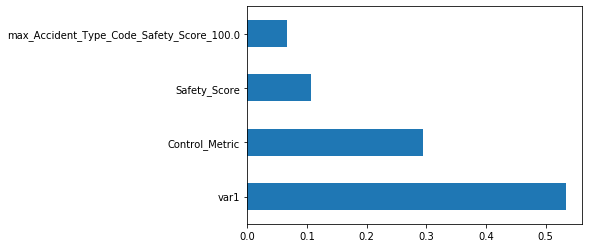

In [148]:
feat_importances = pd.Series(g.feature_importances_, index=train1[feat].columns)
feat_importances.nlargest(20).plot(kind='barh')

In [59]:
feat_imp = pd.DataFrame(list(zip(train1[feat],g.feature_importances_)),columns =['feature','importance'])
feat_imp.sort_values(by='importance',inplace=True,ascending=False)
# x=feat_imp[feat_imp['importance']==0]['feature'].tolist()
# len(x)
feat_imp

,feature,importance
4,var1,0.522677
2,Control_Metric,0.251864
14,max_Accident_Type_Code_Safety_Score_100.0,0.059663
0,Safety_Score,0.052712
10,median_Days_Since_Inspection_var1,0.020801
7,var9,0.017690
12,range_Accident_Type_Code_var1,0.015875
6,var7,0.013262
8,var13,0.010470
11,range_Days_Since_Inspection_Safety_Score,0.008717


In [126]:
feat_imp = pd.DataFrame(list(zip(train_x0,g.feature_importances_)),columns =['feature','importance'])
feat_imp.sort_values(by='importance',inplace=True,ascending=False)
# x=feat_imp[feat_imp['importance']==0]['feature'].tolist()
# len(x)
feat_imp

,feature,importance
0,var1,0.515734
1,Control_Metric,0.257136
3,max_Accident_Type_Code_Safety_Score,0.062453
2,Safety_Score,0.050043
9,range_Days_Since_Inspection_Safety_Score,0.024025
5,var9,0.020035
7,var13,0.016522
10,std_Accident_Type_Code_Max_Elevation,0.015150
8,var7,0.015020
6,var2,0.013919


In [257]:
x=feat_imp['feature'][:10]

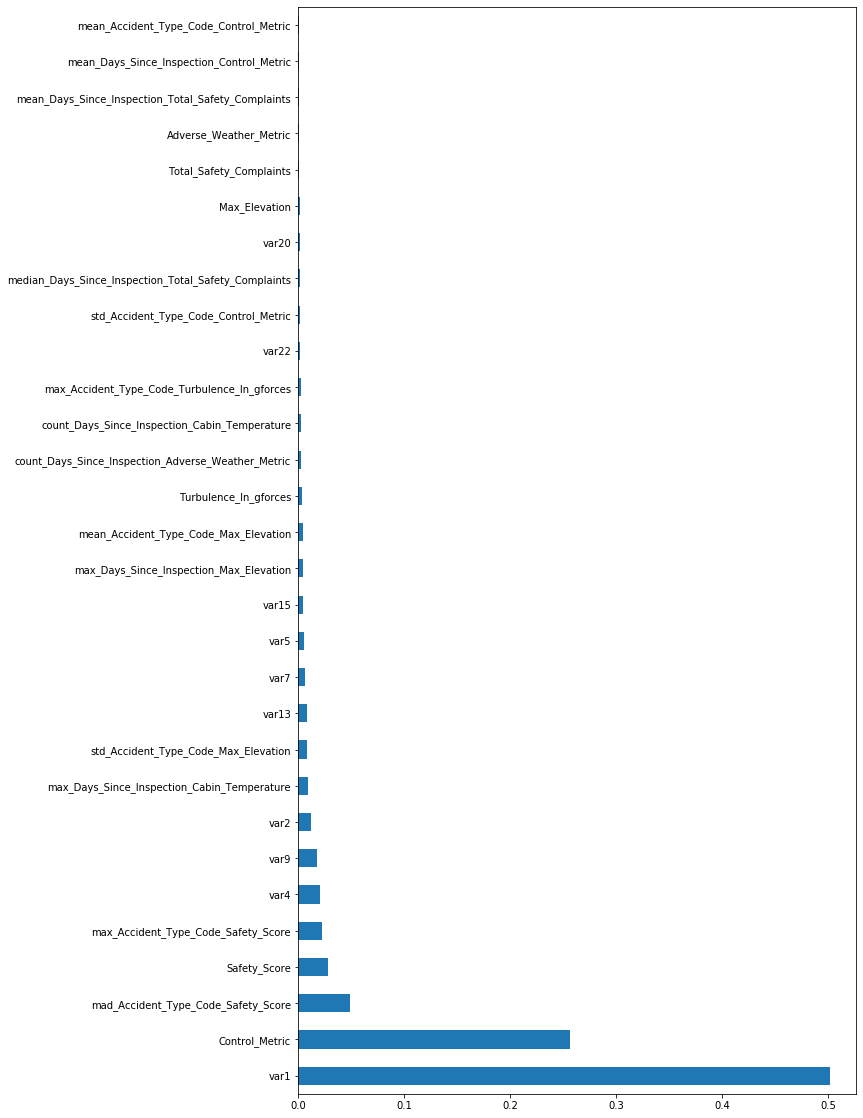

In [176]:
plt.figure(figsize=(10,20))

feat_importances = pd.Series(g.feature_importances_, index=train_x0.columns)
feat_importances.nlargest(30).plot(kind='barh')

In [213]:
feat_imp = pd.DataFrame(list(zip(train_x0,g.feature_importances_)),columns =['feature','importance'])
feat_imp.sort_values(by='importance',inplace=True,ascending=False)
# x=feat_imp[feat_imp['importance']==0]['feature'].tolist()
# len(x)
feat_imp

,feature,importance
8,var1,5.020077e-01
2,Control_Metric,2.565946e-01
93,mad_Accident_Type_Code_Safety_Score,2.786935e-02
0,Safety_Score,2.622729e-02
79,mad_Accident_Type_Code_var1,2.090183e-02
10,var4,2.072162e-02
91,max_Accident_Type_Code_Safety_Score,2.053863e-02
19,median_Days_Since_Inspection_var1,1.936981e-02
13,var9,1.677282e-02
9,var2,1.191837e-02


In [157]:
a1 =  pd.DataFrame(list(zip(test['Accident_ID'],ensemble)),
                   columns =['Accident_ID','Severity'])

In [158]:
a1['Severity'].replace({1:'Minor_Damage_And_Injuries',
               3:'Significant_Damage_And_Fatalities',
               2:'Significant_Damage_And_Serious_Injuries',
               4:'Highly_Fatal_And_Damaging'},inplace=True)

In [159]:
a1.to_csv('8feb_ensemble.csv',index=False)

### Feature Selection using RFECV

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
grf=GradientBoostingClassifier(n_estimators=1000,random_state=1729)

In [30]:
from sklearn.feature_selection import RFECV

In [31]:
rfecv=RFECV(estimator=grf,step=2,verbose=1,cv=2,scoring='f1_weighted',n_jobs=4)

In [32]:
rfecv = rfecv.fit(train1,target)

Fitting estimator with 60 features.
Fitting estimator with 58 features.
Fitting estimator with 56 features.
Fitting estimator with 54 features.
Fitting estimator with 52 features.
Fitting estimator with 50 features.
Fitting estimator with 48 features.
Fitting estimator with 46 features.
Fitting estimator with 44 features.
Fitting estimator with 42 features.
Fitting estimator with 40 features.
Fitting estimator with 38 features.
Fitting estimator with 36 features.
Fitting estimator with 34 features.
Fitting estimator with 32 features.
Fitting estimator with 30 features.
Fitting estimator with 28 features.
Fitting estimator with 26 features.
Fitting estimator with 24 features.
Fitting estimator with 22 features.
Fitting estimator with 20 features.
Fitting estimator with 18 features.


In [33]:
rfecv.grid_scores_

array([0.75165338, 0.91303556, 0.95920278, 0.95857594, 0.96049888,
       0.96019442, 0.96129639, 0.96060942, 0.96150184, 0.96020291,
       0.95929713, 0.95890658, 0.95870251, 0.95890879, 0.95930538,
       0.95940937, 0.95750611, 0.95790687, 0.95810336, 0.95790723,
       0.95960888, 0.95790543, 0.95890463, 0.95900493, 0.95920299,
       0.95850543, 0.95820479, 0.9584022 , 0.95840719, 0.9586038 ,
       0.95790806])

In [34]:
print('Mean of grid scores: ',np.mean(rfecv.grid_scores_))
print('Standard Deviation of grid scores: ',np.std(rfecv.grid_scores_))

Mean of grid scores:  0.9508833294491122
Standard Deviation of grid scores:  0.03728398387904663


In [104]:
print('Mean of grid scores: ',np.mean(rfecv.grid_scores_))
print('Standard Deviation of grid scores: ',np.std(rfecv.grid_scores_))

Mean of grid scores:  0.9383782015537852
Standard Deviation of grid scores:  0.05779950132404519


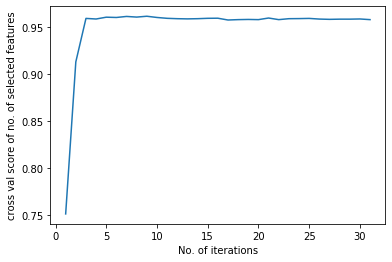

In [35]:
plt.figure()
plt.xlabel('No. of iterations')
plt.ylabel('cross val score of no. of selected features')
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()

In [36]:
print('optimum no. of features',rfecv.n_features_)

optimum no. of features 16


In [37]:
imp_features = list(train1.columns[rfecv.support_])

In [242]:
imp_features

['Safety_Score',
 'Control_Metric',
 'var1',
 'median_Days_Since_Inspection_var1',
 'mad_Accident_Type_Code_Safety_Score']

In [27]:
imp_features = list(train1.columns[rfecv.support_])
imp_features

['Safety_Score',
 'Control_Metric',
 'var1',
 'var4',
 'var9',
 'median_Days_Since_Inspection_var1',
 'mad_Accident_Type_Code_Safety_Score',
 'range_Accident_Type_Code_Safety_Score']

In [117]:
imp_features

['var1',
 'Control_Metric',
 'Safety_Score',
 'max_Accident_Type_Code_Safety_Score',
 'var5',
 'var9',
 'var2',
 'var13',
 'var7',
 'range_Days_Since_Inspection_Safety_Score',
 'std_Accident_Type_Code_Max_Elevation']

In [38]:
imp_features

['Safety_Score',
 'Days_Since_Inspection',
 'Control_Metric',
 'Turbulence_In_gforces',
 'var1',
 'var5',
 'var7',
 'var9',
 'var13',
 'var20',
 'median_Days_Since_Inspection_var1',
 'range_Days_Since_Inspection_Safety_Score',
 'max_Days_Since_Inspection_Cabin_Temperature',
 'range_Accident_Type_Code_var1',
 'max_Accident_Type_Code_Turbulence_In_gforces',
 'max_Accident_Type_Code_Safety_Score_100.0']